In [2]:
import numpy as np
import pandas as pd
# im
import matplotlib.pyplot as plt
import seaborn as sns

In [416]:
def plot_data(X,y,title='Closed form solution'):
    xlabel='X'
    ylabel='y'
    plt.scatter(X,y)

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(title)

def random_data(n,a=3,b=4,plotting=False):
    '''generate random data of given shape with some gaussian noise'''

    X=np.random.rand(n,1) #returns random value in a given shape, in this case nx1 (uniform probability distribution)
    y=b + a*X+ np.random.randn(n,1) #the randn function is similar. except it generates gaussian noise
    if plotting==True:
        plot_data(X,y,title='Data')
        plt.show()

    ind=np.argsort(X,axis=0)
    X=np.take_along_axis(X,ind,axis=0)
    y=np.take_along_axis(y,ind,axis=0)


    return X,y



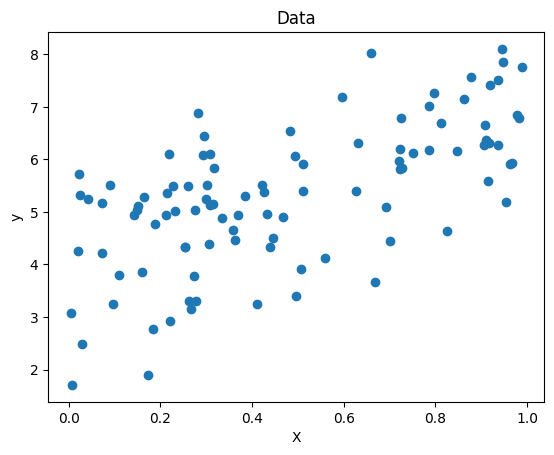

In [417]:
X,y=random_data(100,plotting=True)

We use this following equation for closed form solution : 
$$ \hat \theta = (X^TX)^{-1}\cdot X^T \cdot y$$

[[3.95861102]
 [2.86156789]]


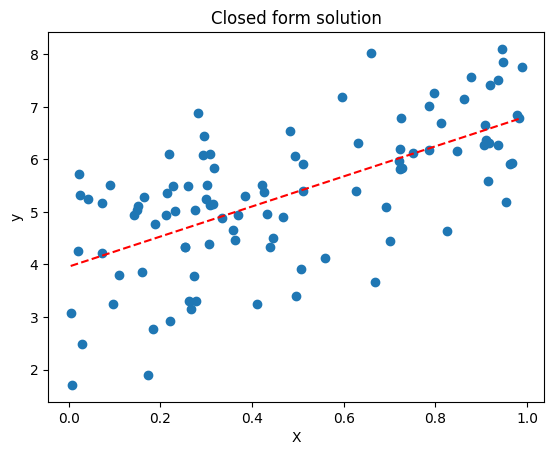

In [419]:
def get_weights_closed_form(X,y):  
    '''returns closed form solution for weights'''
    # X=np.concatenate((np.ones((n,1)),X_),axis=1)  #add ones to the data to accomodate bias term
    #dataset is now nx2 [or nx(m+1)]
    XT=np.transpose(X)
    weights=np.matmul(np.linalg.inv(np.matmul(XT,X)),np.matmul(XT,y))
    return weights

X_=np.concatenate((np.ones((n,1)),X),axis=1)
w=get_weights_closed_form(X_,y)
print(w)
pred=np.dot(X_,w)

plot_data(X,y)
plt.plot(X,pred,color='red',linestyle='--')
plt.show()

In [420]:
def mse(x1,x2):
    n=x1.shape[0]
    return (0.5/n)*np.sum(np.square((x1-x2)))

def grad(X,y,w):
    '''1D batch gradient descent''' 
    #note: @ means matrix mulitplication (np.matmul)
    return (2/n)*(X.T)@(X@w-y) #gradient vector   
    
grad(X_,y,w)
# X.shape


array([[3.12944115e-15],
       [1.76941795e-15]])

In [428]:
def get_weights_grad_descent(X,y,*,learning_rate,epochs):
    # the * force parameteres after that as keyword only arguments
    n,m=X.shape
    w=np.random.randn(m,1)
    XT=X.T
    X1=X[:,1]
    while epochs>1:
        w-=learning_rate*grad(X,y,w)
        epochs-=1
    return w
w_low=get_weights_grad_descent(X_,y,learning_rate=0.01,epochs=100)
w_mid=get_weights_grad_descent(X_,y,learning_rate=0.1,epochs=100)
w_high=get_weights_grad_descent(X_,y,learning_rate=0.8,epochs=100)


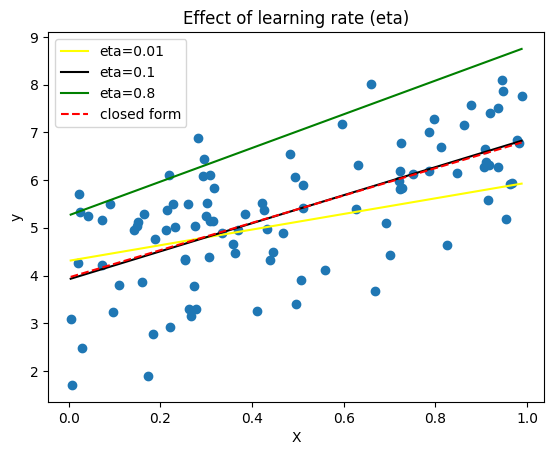

In [429]:
plot_data(X,y,title='Effect of learning rate (eta)')
plt.plot(X,X_@w_low,color='yellow',label='eta=0.01')
plt.plot(X,X_@w_mid,color='black',label='eta=0.1')
plt.plot(X,X_@w_high,color='green',label='eta=0.8')
plt.plot(X,X_@w,color='red',label='closed form',linestyle='--')
plt.legend()
plt.show()


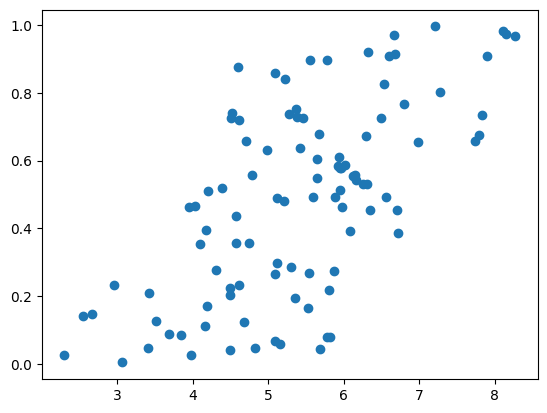

In [343]:
plt.scatter(X,y)